In [1]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg

import suite2p as s2p

import TwoPUtils
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
basedir_VR = '/home/mplitt/VR_scratch'
figdir_local = '/mnt/BigDisk/YMazeResults/behavior'
figdir_remote = '/STX3_2P_results/scratch'

In [3]:
concat_sess = u.single_mouse_concat_sessions(ko_mice[0],date_inds=np.arange(0,6))

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


28_09_2020 YMaze_LNovel
29_09_2020 YMaze_LNovel
30_09_2020 YMaze_LNovel
01_10_2020 YMaze_LNovel
02_10_2020 YMaze_LNovel
03_10_2020 YMaze_LNovel
['LR', 'block_number']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
LR
block_number
sess_num_ravel
sess_num


In [4]:
concat_sess.trial_matrices['licks']

array([[0.        , 0.        , 0.        , ..., 1.08695652, 0.        ,
               nan],
       [0.        , 0.        , 0.        , ..., 1.18518519, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27777778,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.56666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.87234043, 0.        ,
        0.        ]])

In [6]:
stx.behavior.trial_metrics.get_probes_and_omissions(concat_sess)
stx.behavior.trial_metrics.antic_consum_licks(concat_sess)
stx.behavior.trial_metrics.single_trial_lick_metrics(concat_sess)

AttributeError: 'list' object has no attribute 'shape'

In [16]:
sess.trial_info['lick_acc']

array([0.28749641, 0.99985716, 0.5999925 , 0.        , 0.74993751,
       0.99996667, 0.        , 0.09734427, 0.1190462 , 0.51349964,
       0.81815703, 0.45832378, 0.28332861, 0.83329861, 0.82976958,
       0.9998889 , 0.80700339, 0.99992308, 0.6599934 , 0.64149733,
       0.22221728, 0.99994445, 0.99975006, 0.99987502, 0.99983336,
       0.99992308, 0.99998462, 0.86663778, 0.9354537 , 0.99995455,
       0.99980004, 0.99991667, 0.99991667, 0.99983336, 0.7272595 ,
       0.99997059, 0.99996296, 0.99994445, 0.99992308, 0.9629273 ,
       0.99990001, 0.99993334, 0.99994737, 0.50806042, 0.99975006,
       0.99995455, 0.99993334, 0.65514982, 0.99995238, 0.99992858,
       0.9999091 , 0.999975  , 0.99996875, 0.90475113, 0.99950025,
       0.99996875, 0.99996429, 0.99997222, 0.99995455, 0.99995455,
       0.99987502, 0.99993334, 0.99997143, 0.99995652, 0.99992858,
       0.99997727, 0.99993334, 0.80644294, 0.9999091 , 0.99996429,
       0.99993334, 0.99995652, 0.599992  , 0.9998889 , 0.99990

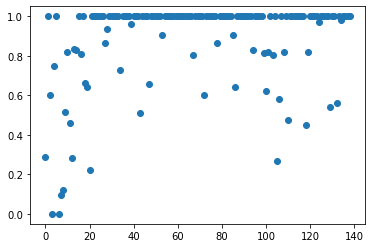

In [17]:
fig, ax = plt.subplots()
ax.scatter(np.arange(sess.trial_info['lick_acc'].shape[0]),sess.trial_info['lick_acc'])